ThetaRule(theta=0)
ThetaRule
ThetaRule(theta=1)
RK4
MidpointIter(eps_iter=0.01, max_iter=2)
LeapfrogFiltered


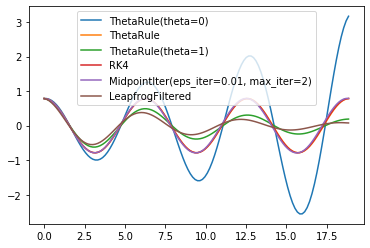

In [15]:
from math import pi, sqrt

class Problem:
    def __init__(self, c, Theta):
        self.c, self.Theta = float(c), float(Theta)

        self.freq = sqrt(c)
        self.period = 2*pi/self.freq

    def f(self, u, t):
        theta, omega = u;  c = self.c
        return [omega, -c*theta]

problem = Problem(c=1, Theta=pi/4)

import odespy
solvers = [
    odespy.ThetaRule(problem.f, theta=0),   # Forward Euler
    odespy.ThetaRule(problem.f, theta=0.5), # Midpoint method
    odespy.ThetaRule(problem.f, theta=1),   # Backward Euler
    odespy.RK4(problem.f),
    odespy.MidpointIter(problem.f, max_iter=2, eps_iter=0.01),
    odespy.LeapfrogFiltered(problem.f),
    ]

N_per_period = 20
T = 3*problem.period   # final time
import numpy
import matplotlib.pyplot as plt
legends = []

for solver in solvers:
    solver_name = str(solver)  # short description of solver
    print(solver_name)

    solver.set_initial_condition([problem.Theta, 0])
    N = N_per_period*problem.period
    time_points = numpy.linspace(0, T, int(N+1))

    u, t = solver.solve(time_points)

    theta = u[:,0]
    legends.append(solver_name)
    plt.plot(t, theta)
#    plt.hold('on')
plt.legend(legends)
plotfile ='dg'
plt.savefig(plotfile + '.png'); plt.savefig(plotfile + '.pdf')
plt.show()